In [39]:
import pandas as pd
import matplotlib.pyplot as plt
flights = pd.read_csv("airport_flights_30000.csv")
staff = pd.read_csv("staff_roster_2000.csv")
ground = pd.read_csv("ground_handling_logs_90000.csv")

print("Files loaded successfully")




Files loaded successfully


In [40]:
print("\nAirport Flights:")
print(flights.head().to_string())

print("\nStaff Roster:")
print(staff.head().to_string())

print("\nGround Handling Logs:")
print(ground.head().to_string())



Airport Flights:
  flight_id        date terminal aircraft_type arrival_time departure_time  turnaround_time_min  delay_minutes
0  FL000001  2024-01-01       T1     Wide Body        21:49          22:38                   49              5
1  FL000002  2024-01-01       T3   Narrow Body        07:37          08:29                   52              0
2  FL000003  2024-01-01       T1   Narrow Body        20:09          21:38                   89              0
3  FL000004  2024-01-01       T3   Narrow Body        07:27          08:31                   64              5
4  FL000005  2024-01-01       T3     Wide Body        22:10          00:14                  124              5

Staff Roster:
  staff_id        role terminal shift_start shift_end
0   S00001      Loader       T2       22:00     06:00
1   S00002  Supervisor       T3       22:00     06:00
2   S00003  Technician       T3       14:00     22:00
3   S00004      Loader       T2       06:00     14:00
4   S00005  Supervisor       T2

In [41]:
# Convert date
flights['date'] = pd.to_datetime(flights['date'])

# Convert numeric columns
flights['delay_minutes'] = flights['delay_minutes'].fillna(0).astype(int)
ground['staff_required'] = ground['staff_required'].astype(int)
ground['task_duration_min'] = ground['task_duration_min'].astype(int)

print("\nData cleaning completed")



Data cleaning completed


In [42]:
ground['total_workload_minutes'] = (
    ground['staff_required'] * ground['task_duration_min']
)

print("\nGround workload calculation:")
print(ground[['flight_id','total_workload_minutes']].head().to_string())



Ground workload calculation:
  flight_id  total_workload_minutes
0  FL000001                     312
1  FL000001                     315
2  FL000001                     205
3  FL000002                     136
4  FL000002                     220


In [43]:
flight_workload = (
    ground.groupby('flight_id')['total_workload_minutes']
    .sum()
    .reset_index()
)

print("\nFlight-wise Workload:")
print(flight_workload.head(10).to_string())



Flight-wise Workload:
  flight_id  total_workload_minutes
0  FL000001                     832
1  FL000002                     510
2  FL000003                     172
3  FL000004                     438
4  FL000005                     535
5  FL000006                     287
6  FL000007                     597
7  FL000008                     592
8  FL000009                     521
9  FL000010                     496


In [44]:
df = flights.merge(
    flight_workload,
    on='flight_id',
    how='left'
)

df['total_workload_minutes'] = df['total_workload_minutes'].fillna(0)

print("\nMerged Dataset:")
print(df.head().to_string())



Merged Dataset:
  flight_id       date terminal aircraft_type arrival_time departure_time  turnaround_time_min  delay_minutes  total_workload_minutes
0  FL000001 2024-01-01       T1     Wide Body        21:49          22:38                   49              5                     832
1  FL000002 2024-01-01       T3   Narrow Body        07:37          08:29                   52              0                     510
2  FL000003 2024-01-01       T1   Narrow Body        20:09          21:38                   89              0                     172
3  FL000004 2024-01-01       T3   Narrow Body        07:27          08:31                   64              5                     438
4  FL000005 2024-01-01       T3     Wide Body        22:10          00:14                  124              5                     535


In [45]:
df['risk_flag'] = df['delay_minutes'].apply(
    lambda x: 'High Risk' if x > 15 else 'Normal'
)

risk_counts = df['risk_flag'].value_counts()

print("\nDelay Risk Classification:")
print(risk_counts.to_string())



Delay Risk Classification:
risk_flag
Normal       22575
High Risk     7425


In [46]:
daily_demand = (
    df.groupby(df['date'].dt.date)['total_workload_minutes']
    .sum()
)

print("\nDaily Manpower Demand:")
print(daily_demand.to_string())



Daily Manpower Demand:
date
2024-01-01    16159650
2024-01-02       12679


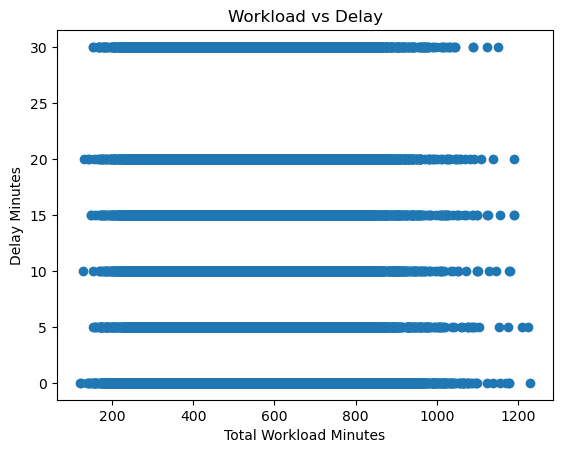

In [47]:
plt.figure()
plt.scatter(df['total_workload_minutes'], df['delay_minutes'])
plt.xlabel("Total Workload Minutes")
plt.ylabel("Delay Minutes")
plt.title("Workload vs Delay")
plt.show()


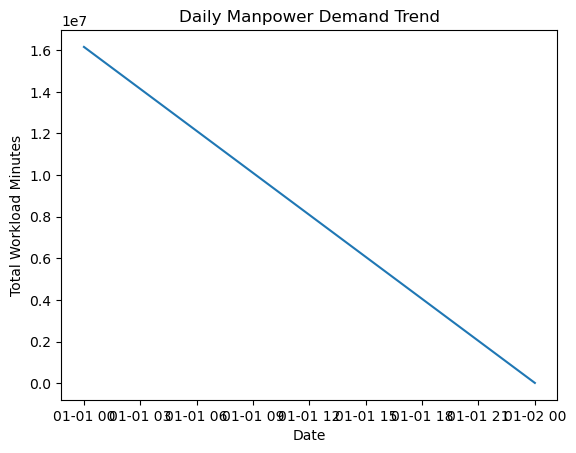

In [48]:
plt.figure()
daily_demand.plot()
plt.xlabel("Date")
plt.ylabel("Total Workload Minutes")
plt.title("Daily Manpower Demand Trend")
plt.show()


In [49]:
high_risk_flights = df[df['risk_flag'] == 'High Risk']

print("\nHigh Risk Flights Sample:")
print(high_risk_flights.head(10).to_string())



High Risk Flights Sample:
   flight_id       date terminal aircraft_type arrival_time departure_time  turnaround_time_min  delay_minutes  total_workload_minutes  risk_flag
9   FL000010 2024-01-01       T2   Narrow Body        01:28          03:36                  128             20                     496  High Risk
17  FL000018 2024-01-01       T1     Wide Body        01:54          02:58                   64             20                     356  High Risk
20  FL000021 2024-01-01       T1     Wide Body        09:02          09:54                   52             20                     491  High Risk
26  FL000027 2024-01-01       T1     Wide Body        21:52          23:10                   78             20                     934  High Risk
35  FL000036 2024-01-01       T3     Wide Body        10:38          12:04                   86             30                     588  High Risk
41  FL000042 2024-01-01       T2   Narrow Body        19:29          21:17                  108  

In [50]:
df.to_csv("final_airport_analysis.csv", index=False)
print("\nFinal dataset exported as final_airport_analysis.csv")



Final dataset exported as final_airport_analysis.csv
